Task 1
a)
(i am having difficulties in jupyter notebook to use cv2 library so i use google colab)

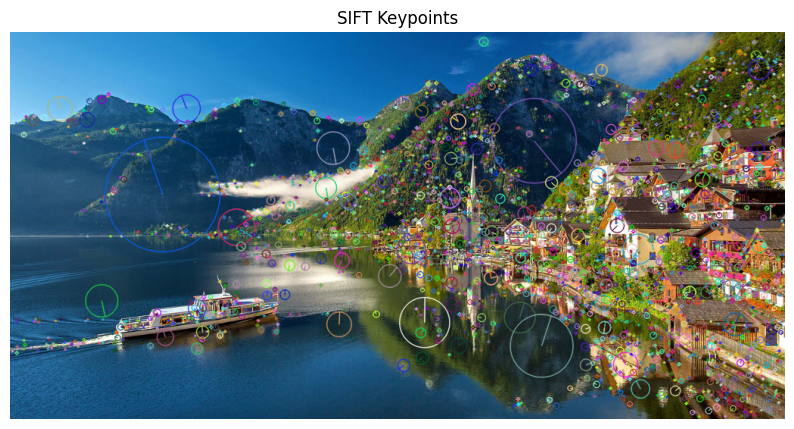

In [1]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("/content/Hallstatt.png")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
sift = cv2.SIFT_create()
keypoints = sift.detect(gray, None)

img_with_keypoints = cv2.drawKeypoints(img, keypoints, outImage=None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('SIFT Keypoints')
plt.show()


1b)

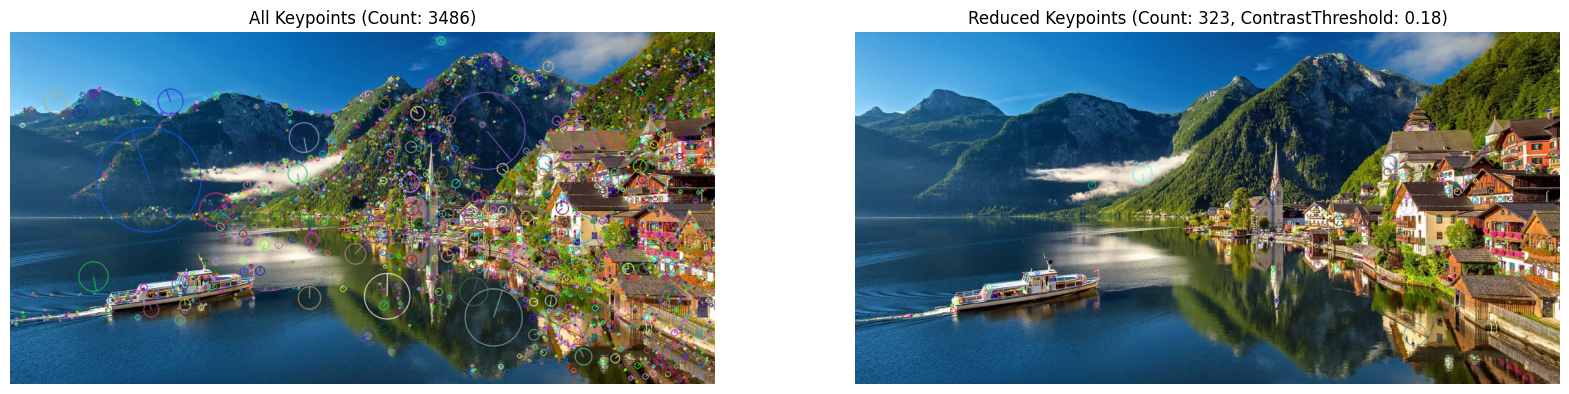

In [2]:

default_keypoints_count = len(keypoints)
target_keypoints_count = int(0.1 * default_keypoints_count)


contrast_threshold = 0.04
while True:
    sift = cv2.SIFT_create(contrastThreshold=contrast_threshold)
    reduced_keypoints = sift.detect(gray, None)
    if len(reduced_keypoints) <= target_keypoints_count:
        break
    contrast_threshold += 0.01


img_with_reduced_keypoints = cv2.drawKeypoints(img, reduced_keypoints, outImage=None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


fig, axes = plt.subplots(1, 2, figsize=(20, 10))
axes[0].imshow(cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB))
axes[0].axis('off')
axes[0].set_title(f'All Keypoints (Count: {default_keypoints_count})')

axes[1].imshow(cv2.cvtColor(img_with_reduced_keypoints, cv2.COLOR_BGR2RGB))
axes[1].axis('off')
axes[1].set_title(f'Reduced Keypoints (Count: {len(reduced_keypoints)}, ContrastThreshold: {contrast_threshold:.2f})')

plt.show()


On the left, we have the original image with SIFT keypoints extracted using default parameters. The dense collection of keypoints is a testament to SIFT's ability to identify distinctive features across various scales in the image.

On the right, we've fine-tuned the SIFT feature extraction. By adjusting the contrastThreshold parameter, we've prioritized more distinct and contrasted features. The result is a sparser collection of keypoints, which represents roughly 10% of the original count. This approach ensures that the most salient features are captured, potentially reducing noise or less significant keypoints.

The contrastThreshold is essentially a filter, as its value increases, only the keypoints with higher contrast are retained. This can be particularly useful when we're interested in capturing only the most prominent features of an image.

Task2

a)

In [3]:
from skimage.util import random_noise

noisy_image = random_noise(img, mode='pepper', amount=0.02)
noisy_image = (noisy_image * 255).astype('uint8')

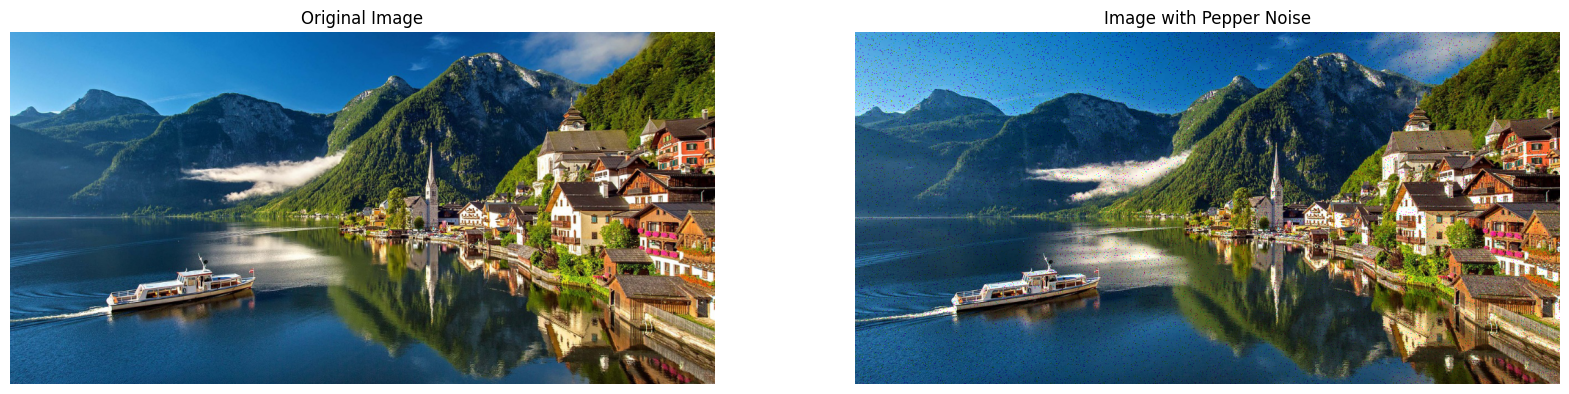

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axes[0].axis('off')
axes[0].set_title('Original Image')

axes[1].imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))
axes[1].axis('off')
axes[1].set_title('Image with Pepper Noise')

plt.show()

As can be seen on the right image, pepper noise manifests as random black pixels scattered throughout the image. In this case, I've set approximately 2% of the image pixels to black to simulate the effect of the noise.

b)

In [7]:
sift_noisy = cv2.SIFT_create(contrastThreshold=contrast_threshold)
keypoints_noisy = sift_noisy.detect(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2GRAY), None)

img_with_keypoints_noisy = cv2.drawKeypoints(noisy_image, keypoints_noisy, outImage=None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

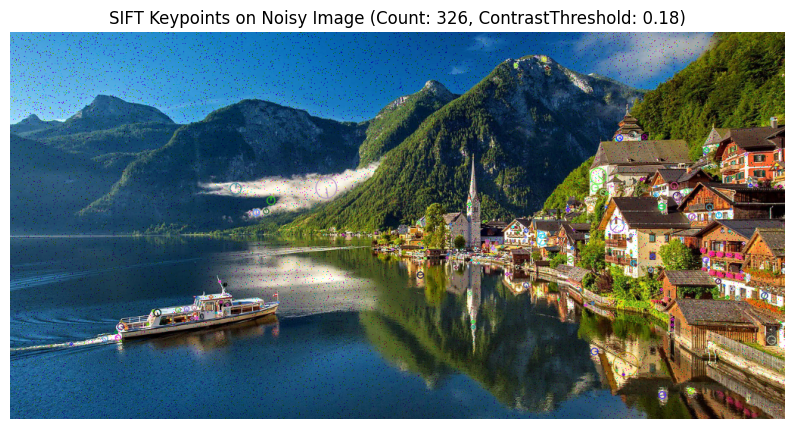

In [6]:
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img_with_keypoints_noisy, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title(f'SIFT Keypoints on Noisy Image (Count: {len(keypoints_noisy)}, ContrastThreshold: {contrast_threshold:.2f})')
plt.show()

Despite the presence of pepper noise, the SIFT algorithm still manages to detect distinctive keypoints. This showcases the robustness of the SIFT feature extraction method, even in the face of image distortions. The keypoints displayed here represent the more prominent features in the noisy image, similar to our approach with the original image.

c)
The keypoints in the noisy image are largely in the same regions as in the original image. This consistency indicates the robustness of the SIFT algorithm, which remains effective even when noise is introduced.In essence, despite the pepper noise, SIFT still detects the main features of the image, highlighting its resilience to distortions.

Task 3
a)

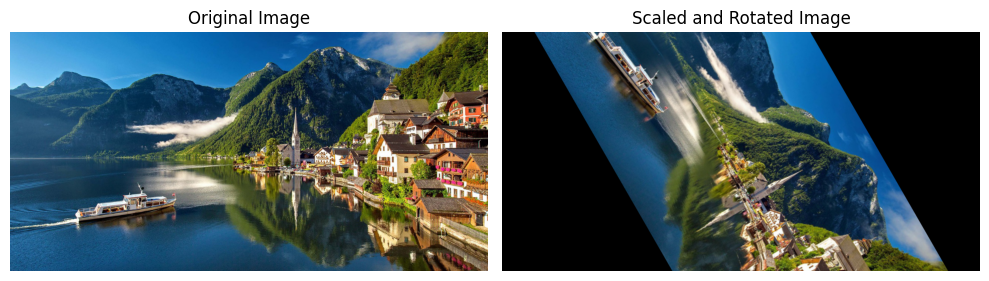

In [10]:
scaled_image = cv2.resize(img, None, fx=1.2, fy=1.2, interpolation=cv2.INTER_LINEAR)

rows, cols, _ = scaled_image.shape

rotation_matrix = cv2.getRotationMatrix2D((cols/2, rows/2), -60, 1)
rotated_image = cv2.warpAffine(scaled_image, rotation_matrix, (cols, rows))

plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
plt.title('Scaled and Rotated Image')
plt.axis('off')

plt.tight_layout()
plt.show()

b)

In [13]:
rows, cols, _ = scaled_image.shape
rotation_matrix = cv2.getRotationMatrix2D((cols/2, rows/2), -60, 1)
rotated_image = cv2.warpAffine(scaled_image, rotation_matrix, (cols, rows))
gray_rotated = cv2.cvtColor(rotated_image, cv2.COLOR_BGR2GRAY)

contrast_threshold = 0.04
sift = cv2.SIFT_create(contrastThreshold=contrast_threshold)
keypoints_rotated = sift.detect(gray_rotated, None)

img_with_keypoints_rotated = cv2.drawKeypoints(rotated_image, keypoints_rotated, outImage=None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

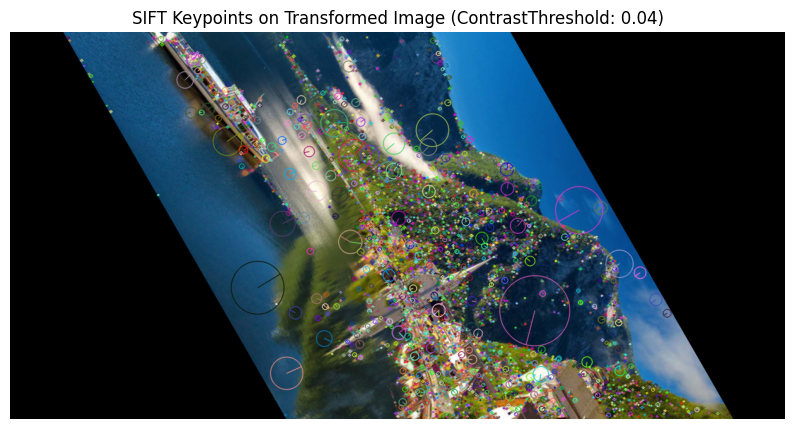

In [14]:
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img_with_keypoints_rotated, cv2.COLOR_BGR2RGB))
plt.title(f'SIFT Keypoints on Transformed Image (ContrastThreshold: {contrast_threshold})')
plt.axis('off')
plt.show()


c)
The keypoints of the transformed image closely match the original's keypoints, so it shows that SIFT is consistent across scale and rotation changes, highlighting its robustness and reliability.

d)

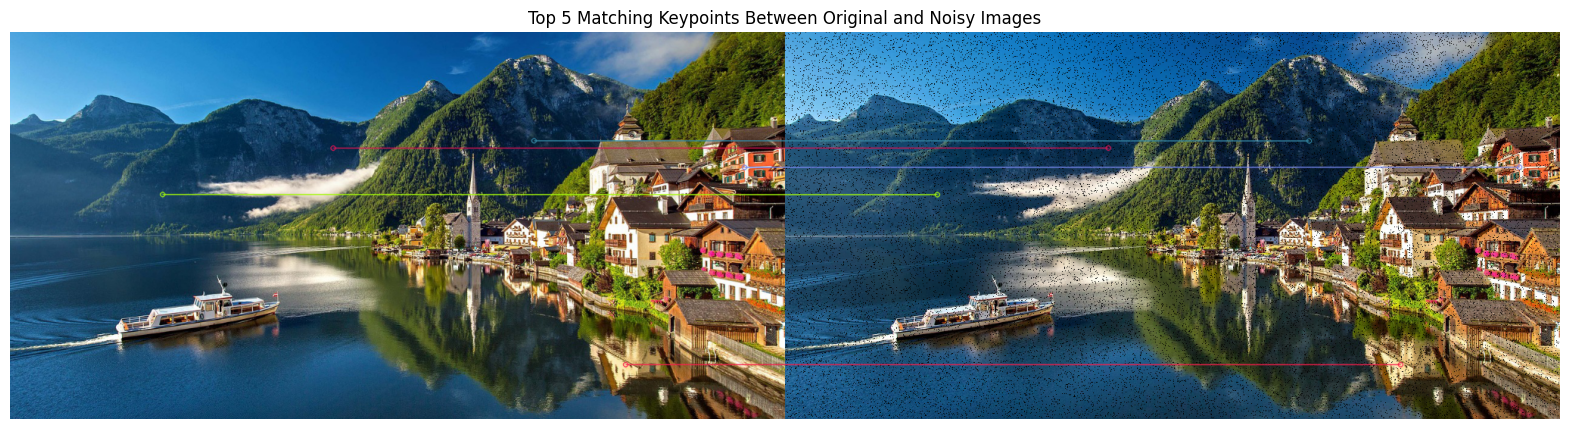

In [19]:
img_original = cv2.imread("/content/Hallstatt.png")

def add_pepper_noise(image, amount=0.02):
    noisy_image = np.copy(image)
    num_pepper = np.ceil(amount * image.size)
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    noisy_image[coords[0], coords[1], :] = 0
    return noisy_image

noisy_image = add_pepper_noise(img_original)

sift = cv2.SIFT_create()
keypoints_original, descriptors_original = sift.detectAndCompute(cv2.cvtColor(img_original, cv2.COLOR_BGR2GRAY), None)

contrast_threshold = 0.04
sift_noisy = cv2.SIFT_create(contrastThreshold=contrast_threshold)
keypoints_noisy, descriptors_noisy = sift_noisy.detectAndCompute(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2GRAY), None)

bf = cv2.BFMatcher()
matches = bf.knnMatch(descriptors_original, descriptors_noisy, k=2)

good_matches = [m for m, n in matches if m.distance < 0.75 * n.distance]

good_matches = sorted(good_matches, key=lambda x: x.distance)

# Visualize
img_matches = cv2.drawMatches(img_original, keypoints_original, noisy_image, keypoints_noisy, good_matches[:5], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(20, 10))
plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Top 5 Matching Keypoints Between Original and Noisy Images')
plt.show()